# CMSE 202 FINAL PROJECT
## Ethan DeMott, Rao Fu, Alexis Wheeler, Krithi Sachithanand 


### Predicting the popularity of songs on Spotify

---

In [8]:
#importing the neccessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from yellowbrick.target import FeatureCorrelation
import seaborn as sns

## Data Exploration

In [3]:
#loading in and reading the data
df = pd.read_csv('spotifydata.csv')
df = df.drop(columns=['id','name','artists','release_date'])
df.head()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,0.0594,1921,0.982,0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,4,0.0366,80.954
1,0.9630,1921,0.732,0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,5,0.4150,60.936
2,0.0394,1921,0.961,0.328,500062,0.166,0,0.913000,3,0.101,-14.850,1,5,0.0339,110.339
3,0.1650,1921,0.967,0.275,210000,0.309,0,0.000028,5,0.381,-9.316,1,3,0.0354,100.109
4,0.2530,1921,0.957,0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,2,0.0380,101.665


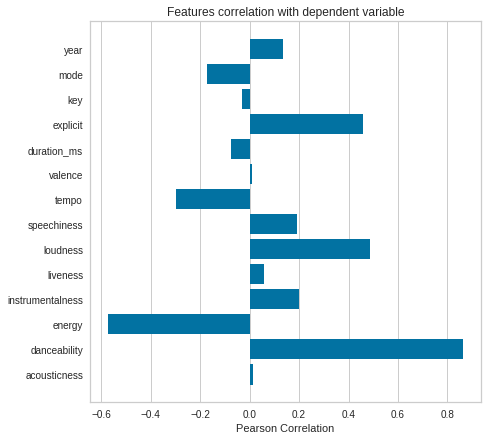

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [12]:
#https://www.kaggle.com/code/vatsalmavani/music-recommendation-system-using-spotify-dataset/notebook
#code used from above

#Creating a Pearson Correlation with 'popularity' being the variable in interest

X, y = df.drop(columns=['popularity']), df['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(7,7)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()


From the Pearson Corrleation graph, features such as energy, danceability, and loudness are significant in predicting popularity, whereas valence, key, and acousticness are not.

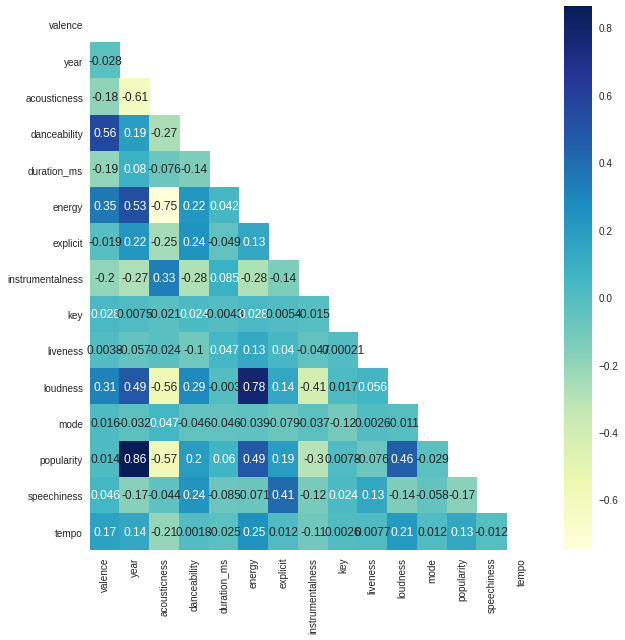

In [13]:
#Creating a Seaborn heat map to display correlation
correlation = df.corr()
fig, ax = plt.subplots(1,1, figsize = (10,10))
mask = np.triu(np.ones_like(correlation, dtype=bool))
correl = sns.heatmap(correlation, mask = mask,  cmap ='YlGnBu', annot = True)

From the heat map we see that Popularity and Year are strongly correlated and Loudness and Energy are strongly correlated as well.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Popularity Distribution')

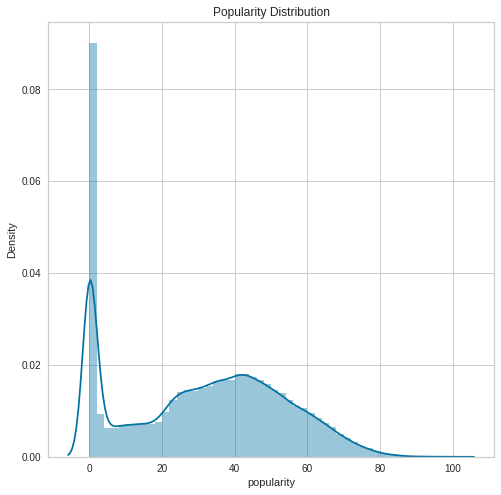

In [28]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.distplot(df['popularity']).set_title('Popularity Distribution')

This distribution plot shows the right skew of "popularity", indicating it is challenging to have a popular song.

----

## Multiple Regression

In [27]:
#Split the data into a training set and a testing set that correspond to 75% and 25% of the data respectively.
Y = np.array(df.popularity)
X = np.array(df.drop(columns=['popularity']))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=123)

In [24]:
#Create a model using OLS
model = sm.OLS(y_train, sm.add_constant(X_train))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                 2.800e+04
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:42:43   Log-Likelihood:            -4.8661e+05
No. Observations:              127989   AIC:                         9.733e+05
Df Residuals:                  127974   BIC:                         9.734e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1287.6494      3.356   -383.648      0.0

According to the p-value of each variables, x5(duration_ms), x9(key), x11(loudness), and x14(tempo) are not significant varaibels.

In [5]:
#Comparing the first couple predicted popularity values from the model to the actual model.
y_hat=result.predict(sm.add_constant(X_test))
print(y_hat)
print(y_test)

[13.31896453 10.54236383 10.10545305 ... 34.08111276  5.67003441
 -1.04891963]
[ 8  1  4 ... 52  0  1]


eval_env: 1


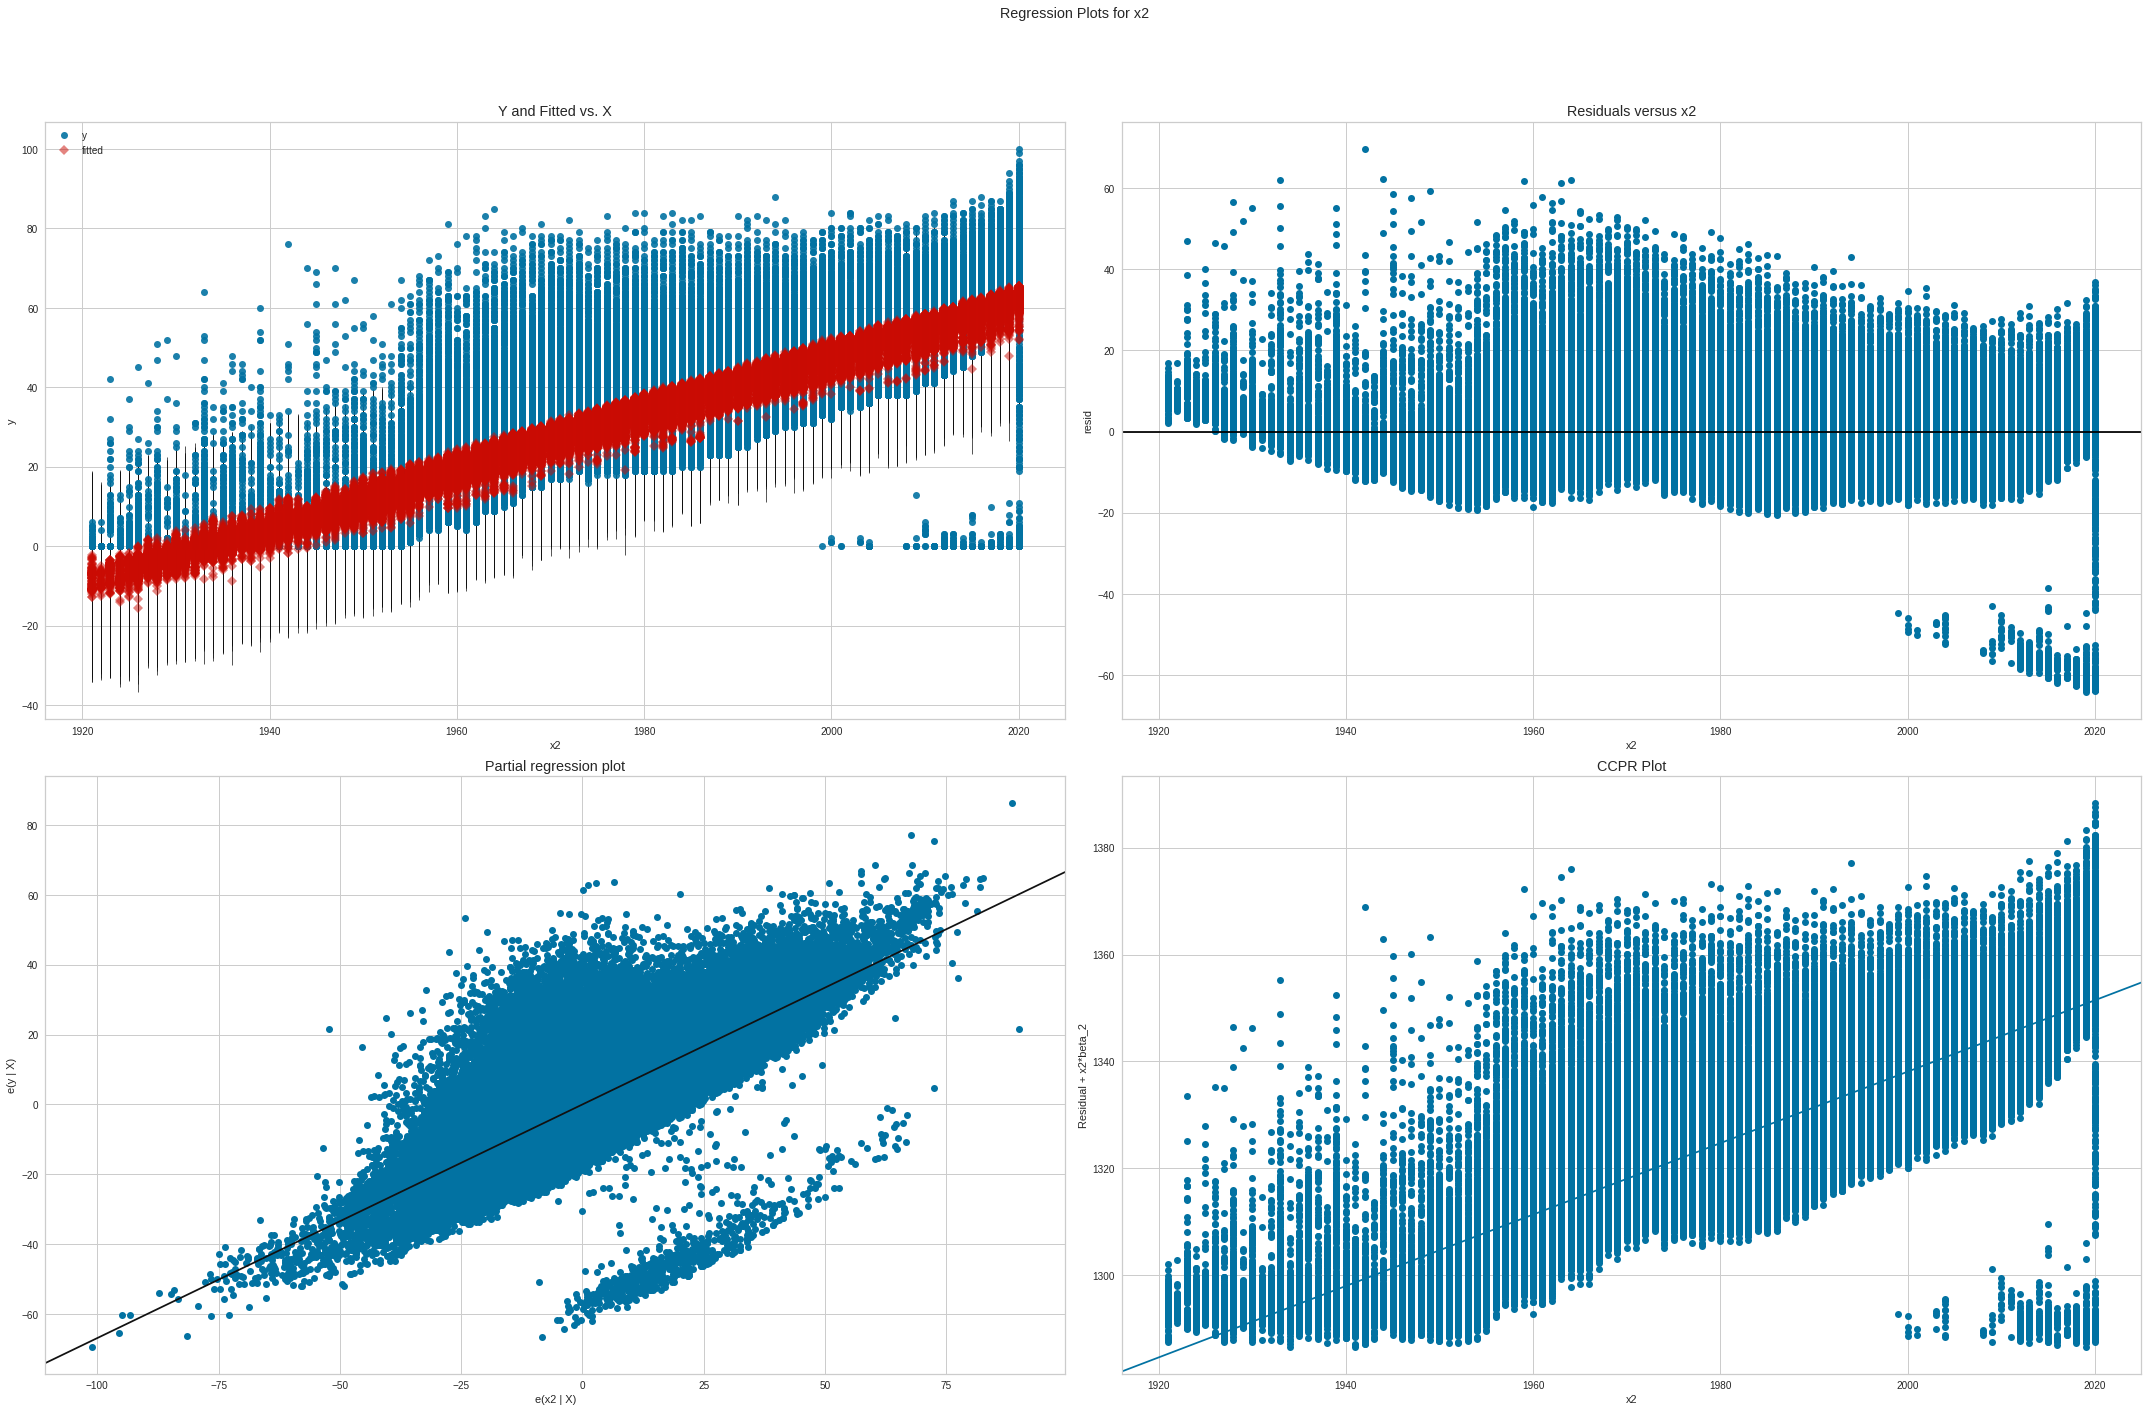

In [19]:
#Creating a regression plot to view results when comparing popularity to year
fig = plt.figure(figsize=(30, 20))
sm.graphics.plot_regress_exog(result, 'x2', fig=fig)
plt.show()

----

## Expanding the Model: Can we improve it?

In [25]:
#Creating a new OLS model based on the features not significant
Y = np.array(df.popularity)
X = np.array(df.drop(columns=['popularity','duration_ms','key','loudness','tempo']))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=123)

In [26]:
model = sm.OLS(y_train, sm.add_constant(X_train))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                 3.920e+04
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:42:51   Log-Likelihood:            -4.8661e+05
No. Observations:              127989   AIC:                         9.732e+05
Df Residuals:                  127978   BIC:                         9.734e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1288.4452      3.331   -386.803      0.0

As we removed the insignificant variables, the model remained the exactly the same. Therefore, this model is not any better than the original at predicting, but the model only has the necessary features, which is important.

In [29]:
#Dropping all rows that have a popularity of 0 to see if that changes the model.
df = df[df.popularity != 0]
Y = np.array(df.popularity)
X = np.array(df.drop(columns=['popularity']))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=123)

In [30]:
model = sm.OLS(y_train, sm.add_constant(X_train))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                 1.575e+04
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:51:07   Log-Likelihood:            -4.0398e+05
No. Observations:              107070   AIC:                         8.080e+05
Df Residuals:                  107055   BIC:                         8.081e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1226.0236      3.805   -322.179      0.0

As we dropped the values with popularity equal to 0 to see if the that impacted our model, r-squared went down, indicating that this may not be an important factor when trying to predict song popularity.

## Other types of regression

In [20]:
#creating a logistic regression modelb
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_test)
LR_Accuracy = accuracy_score(y_test, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))


Accuracy: 0.16414307144196513


/home/demottet/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


With an accuracy of .164, logisitic regression is not going to work well for training this model.